# <span style='color:orange'>MNIST</span>
- 학습용 : 60000 개
- 테스트용 : 10000 개
- 이미지 : 28*28 = 784 => 입력
- 타겟 : 0~9 총 10개 => 출력

## 손글씨 숫자 식별 모델
- 데이터 : MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동작 : 0~9사이 숫자 판별

In [219]:
# 모듈 로딩
import tensorflow as tf
from keras.datasets.mnist import load_data
from keras import Sequential
from keras.layers import Dense, Dropout
import numpy as np

### [1] 데이터 불러오기

In [220]:
(x_train,y_train),(x_test,y_test)=load_data()

In [221]:
print(f"x_train shape : {x_train.shape}, x_test shape : {x_test.shape}")

x_train shape : (60000, 28, 28), x_test shape : (10000, 28, 28)


In [222]:
# 검증용 데이터 셋 준비
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,stratify=y_train)

In [223]:
print(f"x_train shape : {x_train.shape}, x_val shape : {x_val.shape}")
print(f"y_train shape : {y_train.shape}, y_val shape : {y_val.shape}")

x_train shape : (45000, 28, 28), x_val shape : (15000, 28, 28)
y_train shape : (45000,), y_val shape : (15000,)


### [2] 데이터 전처리
- 수치데이터 => 스케일링
- 범주형 데이터 => OHE

In [224]:
# 저장된 값 확인
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [225]:
# 이미지 데이터의 픽셀값 즉, 특성 0.0~1.0으로 스케일링
# 브로드 캐스팅
x_train=x_train/255.
x_val=x_val/255.
x_test=x_test/255.

In [226]:
# 타켓 라벨 => OHE으로 변환
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [227]:
encoder=OneHotEncoder()
encoder.fit(y_train.reshape(-1, 1))
y_train=encoder.transform(y_train.reshape(-1, 1))
y_val=encoder.transform(y_val.reshape(-1, 1))
y_test=encoder.transform(y_test.reshape(-1, 1))

In [228]:
# 원핫인코딩 후 타입확인
type(y_train), type(y_val), type(y_test)

(scipy.sparse._csr.csr_matrix,
 scipy.sparse._csr.csr_matrix,
 scipy.sparse._csr.csr_matrix)

In [229]:
# 타겟 타입 변경
y_train=y_train.toarray()
y_val=y_val.toarray()
y_test=y_test.toarray()

In [230]:
# 타입변경 후
type(y_train), type(y_val), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

### [3] 모델
- (1) 모델구성
- (2) 모델 생성

#### [3-1] 모델 구성
- 입력 데이터 : 784 => 28*28 이미지 데이터
- 출력 데이터 : 10 => 0~9 숫자 라벨
- 학습 방법 : 분류-다중분류

In [243]:
# 모델 테두리 생성
model=Sequential(name='MNIST_NNModel')

In [244]:
# 모델 추가

# Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화 함수, [옵션]input_shape()
model.add(Dense(250,activation='relu',input_shape=(784,)))
model.add(Dropout(0.3))

# 여러개의 은닉층
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))

# 출력층 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화 함수
model.add(Dense(10,activation='softmax'))

In [245]:
# 모델 확인
model.summary()

# 첫번째 레이어에서는 (784+1)*30=23550
# 출력층에서는 (30+1)*10=310

Model: "MNIST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 250)               196250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               25100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


#### [3-2] 모델생성
- loss 함수
  - 이진분류 => binary_crossentropy
  - 다중분류 => sparse_categorical_crossentropy, categorical_crossentropy
- optimizer 기법 => 'rmsprop'
- metrics 평가항목 => 'loss'

In [246]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

### [4] 학습

In [267]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [253]:
# callback 함수 만들기
stopCB=EarlyStopping(monitor='val_loss',patience=3) 

In [283]:
MODEL_PATH='./modelFiles'
modelCB=ModelCheckpoint(MODEL_PATH,save_best_only=True,save_weights_only=True)

- save_best_only=True는 베스트만 보여줌
- save_weights_only=True는 가중치를 넣어서 보겠다는 의미

In [235]:
# 학습을 위한 배열 변경
x_train=x_train.reshape(-1,28*28)
x_val=x_val.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [284]:
his=model.fit(x_train,y_train,epochs=5,
            validation_data=(x_val,y_val),callbacks=[stopCB,modelCB])

Epoch 1/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.1219 - val_accuracy: 0.9796
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.1321 - val_accuracy: 0.9776
Epoch 3/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.1380 - val_accuracy: 0.9783
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0219 - accuracy: 0.9938 - val_loss: 0.1317 - val_accuracy: 0.9790


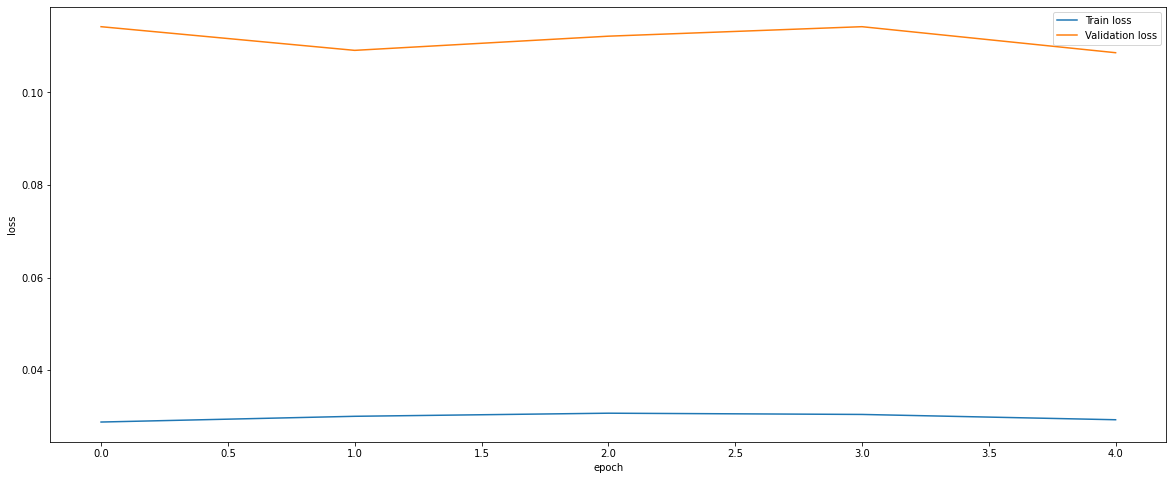

In [270]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(his.epoch,his.history['loss'], label='Train loss')
plt.plot(his.epoch,his.history['val_loss'],label='Validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

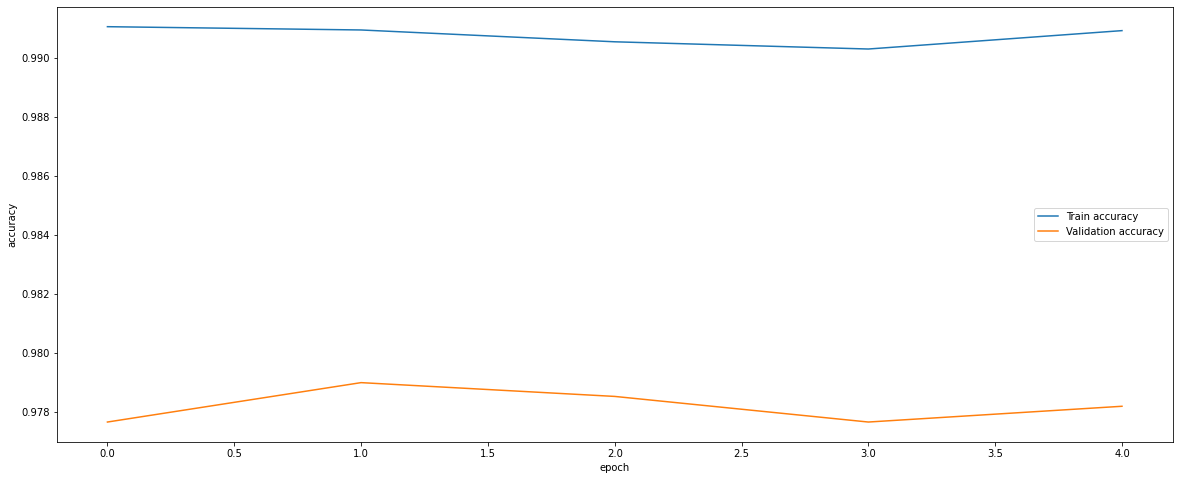

In [271]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(his.epoch,his.history['accuracy'], label='Train accuracy')
plt.plot(his.epoch,his.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### [5] 평가
- evaluate() 메서드
  - test data, target'
  - 반환값: loss, metrics에서 지정한 성능평가항목

In [295]:
test_result=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1270 - accuracy: 0.9820


### [6] 테스트 예측

In [309]:
test_pred=model.predict(x_test[0].reshape(-1,784))
print(f"x_test의\n  예측값 확률은 {np.round(test_pred,2)}입니다.")
print(f"실제값의 확률은 {y_test[0]}입니다.")

1/1 [==============================] - 0s 22ms/step
x_test의
  예측값 확률은 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]입니다.
실제값의 확률은 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]입니다.


In [300]:
test_pred

array([[2.1910031e-29, 5.3903467e-20, 3.5104470e-18, ..., 1.0000000e+00,
        3.6031600e-29, 2.6361939e-25],
       [3.4116369e-22, 4.4651298e-14, 1.0000000e+00, ..., 6.3031065e-28,
        2.4326845e-24, 0.0000000e+00],
       [5.3676607e-17, 1.0000000e+00, 1.3418263e-14, ..., 1.5880621e-12,
        5.9447863e-11, 1.6661111e-19],
       ...,
       [7.3340959e-31, 1.5694241e-18, 4.4521702e-25, ..., 9.5913966e-18,
        2.0997899e-21, 7.5404816e-16],
       [5.6305067e-29, 3.7336408e-28, 2.7461787e-33, ..., 1.4090251e-25,
        1.1640941e-15, 3.6022522e-22],
       [1.6647066e-27, 0.0000000e+00, 2.3209556e-32, ..., 0.0000000e+00,
        1.0872918e-31, 2.3207406e-34]], dtype=float32)

##### epochs=10으로 하여 정확도 값이 떨어지는지 확인하기

In [282]:
MODEL_PATH='./modelFiles2'
modelCB=ModelCheckpoint(MODEL_PATH)
his=model.fit(x_train,y_train,epochs=10,
            validation_data=(x_val,y_val),callbacks=[stopCB,modelCB])

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0260 - accuracy: 0.9926 - val_loss: 0.1332 - val_accuracy: 0.9789
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.1250 - val_accuracy: 0.9784
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0239 - accuracy: 0.9930 - val_loss: 0.1291 - val_accuracy: 0.9783
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.1336 - val_accuracy: 0.9787
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9937 - val_loss: 0.1449 - val_accuracy: 0.9786


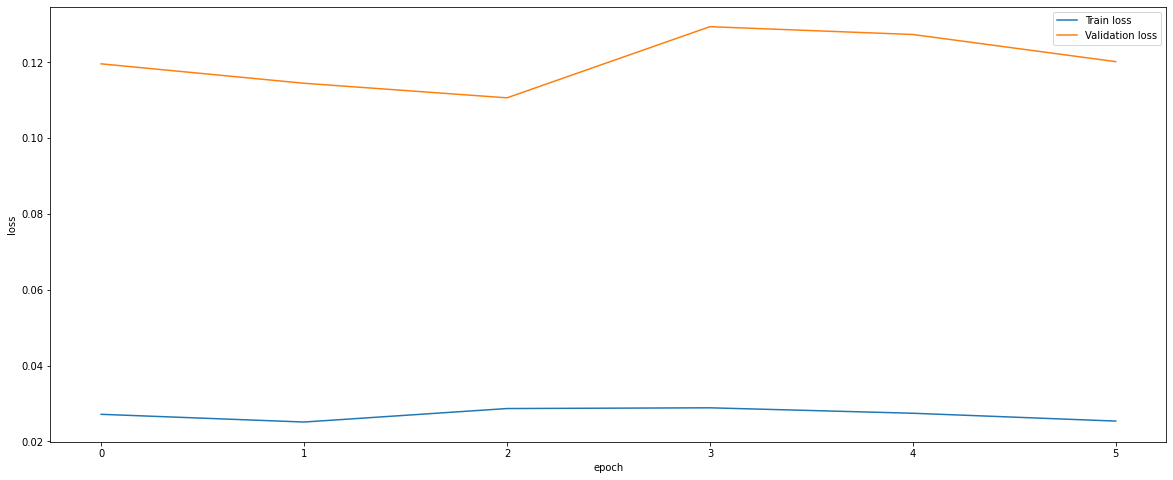

In [276]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(his.epoch,his.history['loss'], label='Train loss')
plt.plot(his.epoch,his.history['val_loss'],label='Validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

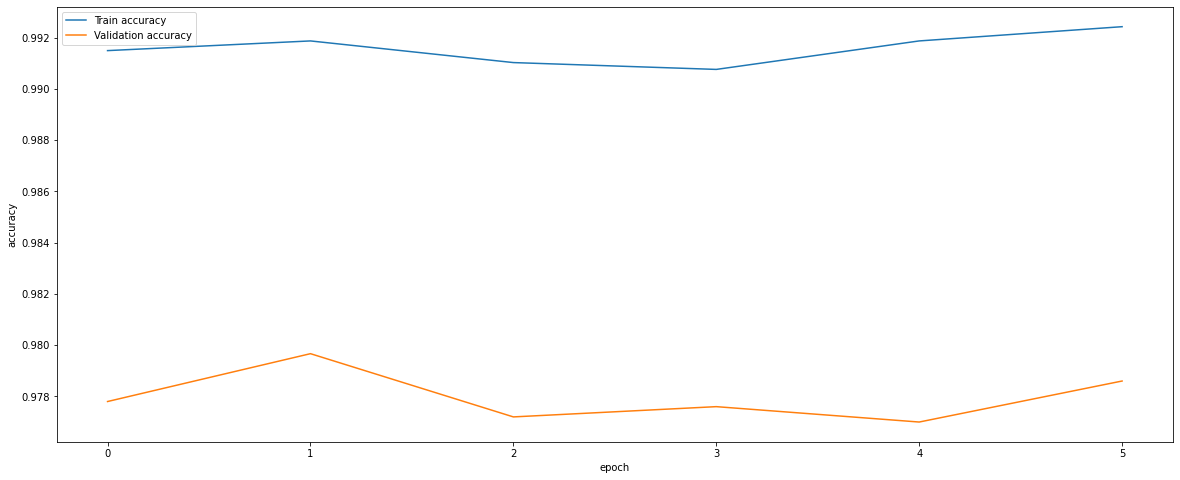

In [277]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(his.epoch,his.history['accuracy'], label='Train accuracy')
plt.plot(his.epoch,his.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

##### model.add()안쓰고 모델 생성하기

In [266]:
model1=Sequential([Dense(10,activation='relu',input_shape=(3,)),Dense(5,activation='relu'),Dense(1,activation='sigmoid')])

##### ModelCheckpoint 연습

In [319]:
MODEL_PATH="{epoch:02d}-{val_loss:.2f}.h5"

modelCB=ModelCheckpoint(MODEL_PATH,save_best_only=True,save_weights_only=True)

In [320]:
his=model.fit(x_train,y_train,epochs=8,
            validation_data=(x_val,y_val),callbacks=[stopCB,modelCB])

Epoch 1/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.1320 - val_accuracy: 0.9791
Epoch 2/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.1363 - val_accuracy: 0.9783
Epoch 3/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 0.1344 - val_accuracy: 0.9796
Epoch 4/8
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.1425 - val_accuracy: 0.9799


In [ ]:
# 모든데이터의 가중치만 저장
model.save_weights()

TypeError: save_weights() missing 1 required positional argument: 'filepath'

In [ ]:
# 
model.save()